In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
import os

datapath = os.path.join("datasets", "lifesat", "")
# 加载数据
full_country_stats = pd.read_csv(datapath + "country_stats.csv", thousands=',')
print(full_country_stats.count())
#清除异常值
remove_indices = [0,1,6,8,33,34,35]
keep_indices = list(set(range(36)) - set(remove_indices))
print(keep_indices)

sample_data = full_country_stats[['Country','GDP per capita','Life satisfaction']].iloc[keep_indices]
missing_data = full_country_stats[['Country','GDP per capita','Life satisfaction']].iloc[remove_indices]
sample_data.info()

Country              36
GDP per capita       36
Life satisfaction    36
dtype: int64
[2, 3, 4, 5, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 2 to 32
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            29 non-null     object 
 1   GDP per capita     29 non-null     float64
 2   Life satisfaction  29 non-null     float64
dtypes: float64(2), object(1)
memory usage: 928.0+ bytes


In [15]:
sample_data.set_index('Country',inplace=True)
missing_data.set_index("Country",inplace=True)

In [16]:
sample_data.head()

,GDP per capita,Life satisfaction
Country,,
Belgium,40106.632,6.9
Brazil,8669.998,7.0
Canada,43331.961,7.3
Chile,13340.905,6.7
Denmark,52114.165,7.5


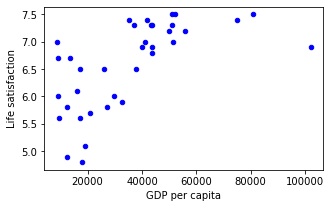

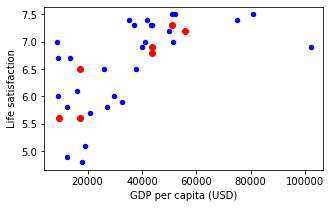

In [19]:
#b是蓝色
full_country_stats.plot(kind='scatter',x='GDP per capita',y='Life satisfaction',figsize=(5,3),c='b')
sample_data.plot(kind='scatter',x='GDP per capita',y='Life satisfaction',figsize=(5,3),c='b')
pos_data_x = missing_data['GDP per capita']
pos_data_y = missing_data['Life satisfaction']
plt.plot(pos_data_x,pos_data_y,'ro')
plt.xlabel('GDP per capita (USD)')
plt.show()

In [20]:
#设置X轴与Y轴
x = np.c_[sample_data['GDP per capita']]
y = np.c_[sample_data['Life satisfaction']]

In [22]:
#选择一个线性模型，线性回归
model = sklearn.linear_model.LinearRegression()
model.fit(x,y)

LinearRegression()

In [26]:
#获得最优拟合直线的截率与斜率
t0 ,t1 = model.intercept_[0] , model.coef_[0][0]
t0,t1

(5.821070654502937, 2.1516816363324514e-05)

In [27]:
#做一个预测，输入塞浦路斯人均GDP，预测该国幸福指数
X_new = [[22587]]
print(model.predict(X_new))

[[6.30707099]]


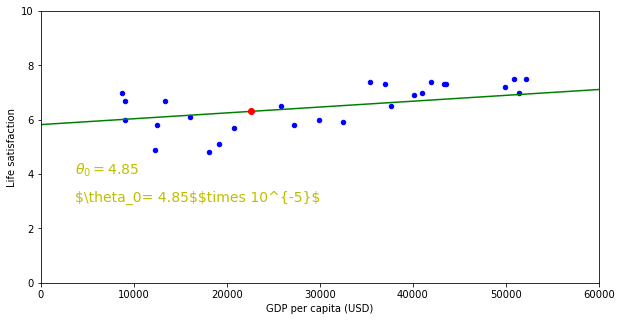

In [40]:
sample_data.plot(kind='scatter',x='GDP per capita',y='Life satisfaction',figsize=(10,5),c='b')
X = np.linspace(0,60000,1000)
plt.plot(X,t0+t1*X,'g')

plt.text(3700,4,r'$\theta_0= 4.85$',fontsize=14,color='y')
plt.text(3700,3,r'$\theta_0= 4.85$\$times 10^{-5}$',color='y',fontsize=14)
#画出塞浦路斯预测点
plt.plot(X_new,model.predict(X_new),'ro')
plt.xlabel("GDP per capita (USD)")
plt.axis([0,60000,0,10])
plt.show()